In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np

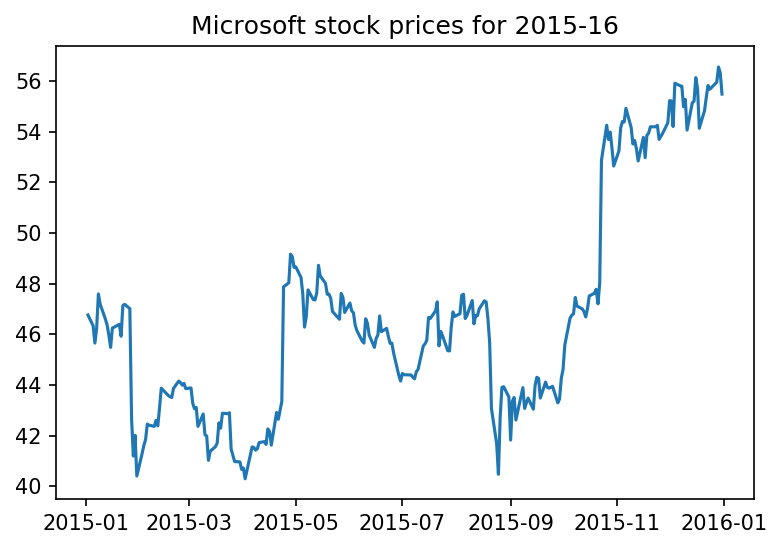

In [8]:
msft = pdr.get_data_yahoo('MSFT', start='2015-1-1',end='2016-1-1')
msft = msft['Close']
msft_ret = msft.pct_change()[1:]
plt.plot(msft.index,msft.values)
plt.title('Microsoft stock prices for 2015-16')
plt.rcParams['figure.dpi'] = 150;

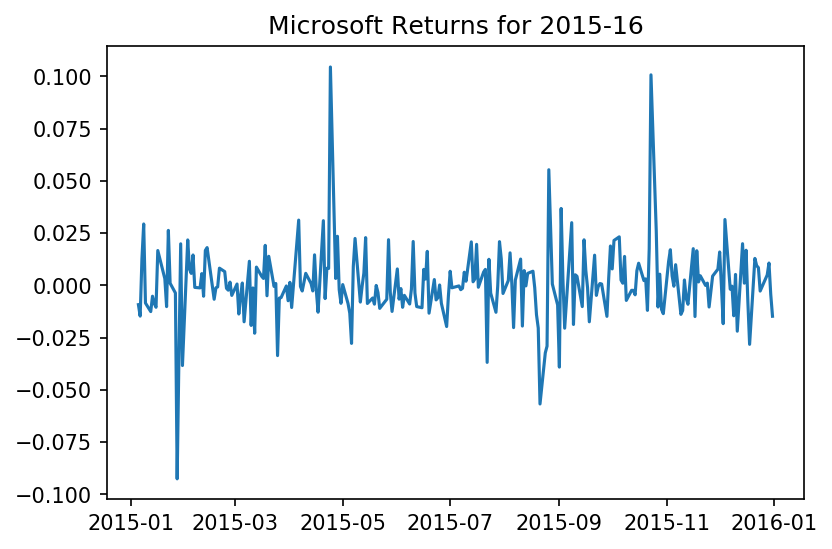

In [7]:
plt.plot(msft_ret.index,msft_ret.values)
plt.title('Microsoft Returns for 2015-16');

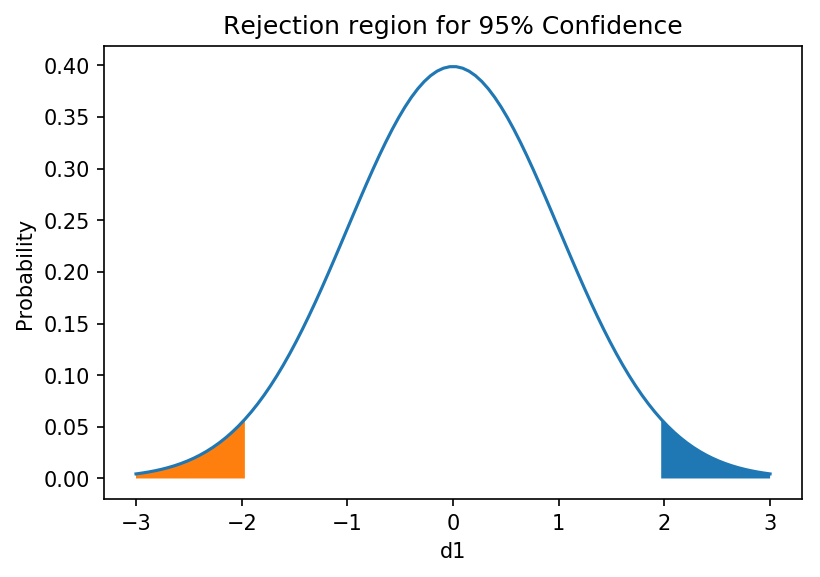

In [18]:
d1 = np.linspace(-3,3,100)
norm_pdf = lambda x : (1/(np.sqrt(2*np.pi)) * np.exp(-x*x/2))
y = norm_pdf(d1)

fig, ax = plt.subplots(1,1,sharex = True)
ax.plot(d1,y)
ax.fill_between(d1,0,y,where = d1 > 1.96)
ax.fill_between(d1,0,y,where = d1 < -1.96)
plt.xlabel('d1')
plt.ylabel('Probability')
plt.title('Rejection region for 95% Confidence');

In [19]:
n = len(msft_ret)
t_stats = (np.mean(msft_ret)-0)/((np.std(msft_ret)/np.sqrt(n)))

In [23]:
from scipy.stats import t
p_val = 2 * (1-t.cdf(t_stats,n-1))
print('test statistics for Microsoft Returns is', t_stats)
print('P Value for the t Statistics is', p_val)
print('Since', t_stats , 'is between -1.65 & 1.65, we fail to reject the null');

test statistics for Microsoft Returns is 0.7464415588258644
P Value for the t Statistics is 0.45610207696277083
Since 0.7464415588258644 is between -1.65 & 1.65, we fail to reject the null


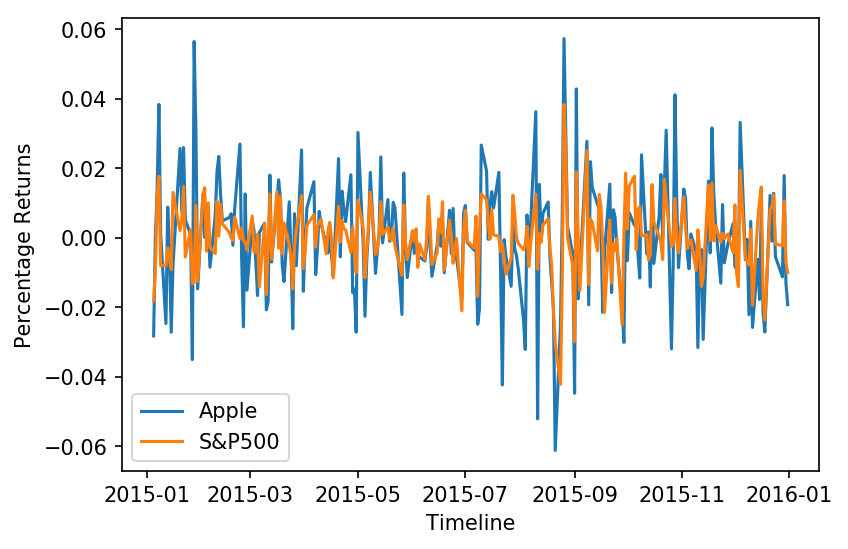

In [31]:
aapl = pdr.get_data_yahoo('AAPL', start='2015-1-1', end='2016-1-1')
spy = pdr.get_data_yahoo('SPY', start='2015-1-1', end='2016-1-1')
aapl = aapl['Close']
spy = spy['Close']
comb = pd.concat([aapl,spy], axis = 1)
comb.columns = ['Apple','S&P']
returns = comb.pct_change()[1:]
plt.plot(returns)
plt.xlabel('Timeline')
plt.ylabel('Percentage Returns')
plt.legend(['Apple','S&P500']);

In [49]:
mean_a, mean_s = returns.mean() # calculating mean for both columns in the data
std_a, std_s = returns.std() # calculating standard deviation for both columns in the data
n_s = len(returns['S&P']) # number of observations
n_a = len(returns['Apple'])
t_stats1 = ((mean_s - mean_a) - 0)/((std_a**2/n_a) + (std_s**2/n_s))**0.5 # manually calculating t-test
dof = ((std_s**2/n_s) + (std_a**2/n_a))**2/(((std_s**2 / n_s)**2 /n_s)+((std_a**2 / n_a)**2/n_a)) # manually calculating Modified DOF
print('t statistics: ',t_stats1) # Welsch's unequal variances t-test
print('Degress of freedon modified: ', dof) # printing out results to decide about significance

t statistics:  0.022157897056974928
Degress of freedon modified:  403.9373134571424


In [53]:
chi_test_stats = (len(msft_ret) - 1) * msft_ret.std()**2 / 0.0001 # manually calculating chi-square
print('Chi Square t statistics: ', chi_test_stats)

Chi Square t statistics:  794.9891044993874


In [55]:
from scipy.stats import chi2 # required module to find critical value
critical_value = chi2.ppf(0.99, len(msft_ret)-1) # chi-squared for 1 % significance 
print('Critical value at 1% significance with', len(msft_ret)-1, 'degrees of freedom is', critical_value)

Critical value at 1% significance with 250 degrees of freedom is 304.9395557339572


In [57]:
print('The standard deviation for S&P is', std_s)
print('The standard deviation for Apple is', std_a)

The standard deviation for S&P is 0.00983091050608374
The standard deviation for Apple is 0.01686380649484143


In [60]:
f_stat_test = (std_a/std_s)**2 #manually calculating f-stats
from scipy.stats import f
dof1 = len(returns['Apple']) - 1
dof2 = len(returns['S&P']) - 1
upper_crit_val=f.ppf(0.975,dof1,dof2) # critical value to find if the null hypothesis is true
lower_crit_val=f.ppf(0.025,dof1,dof2) 
print('F statistics value is', f_stat_test)
print('upper critical value is', upper_crit_val) 
print('lower critical value is', lower_crit_val)

F statistics value is 2.9425492146535253
upper critical value is 1.2820806494835295
lower critical value is 0.7799821332634866
